In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
from scipy.io import wavfile as wav
from scipy.fftpack import fft
from pylab import stem
from pydub import AudioSegment

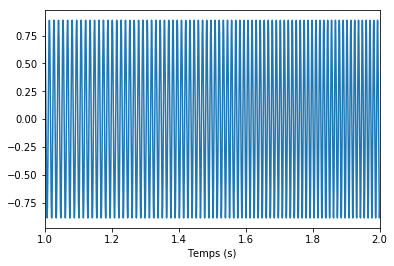

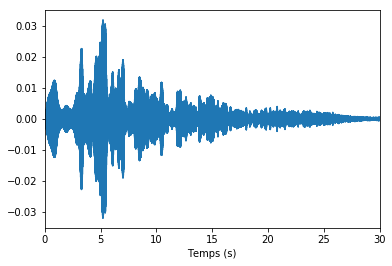

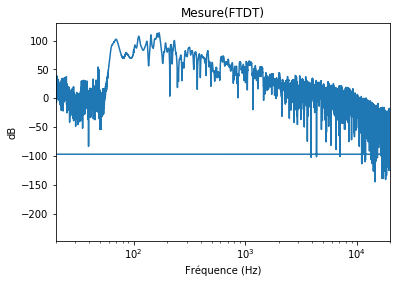

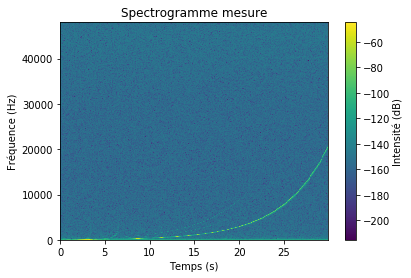

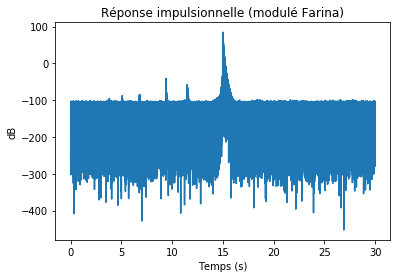

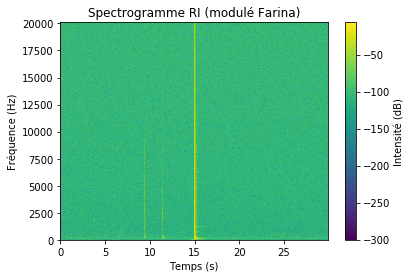

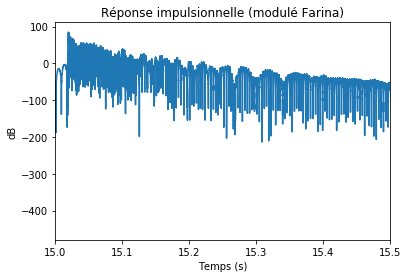

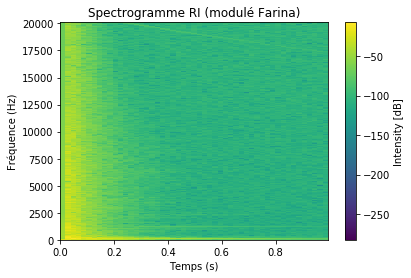

In [7]:
fe=96000
time = np.linspace(0, 30, 30*96000)

#fadein 400ms
#fadeout

#original = np.sin((60*60*np.pi)/np.log(350)*(np.exp(time*np.log(350)/30)-1)) #génère sine-sweep 60Hz-20000Hz
rate, recorded = wav.read('tri_maison_28/00x07,3y21,2z_cloisonter-004.wav') #chargement du fichier et de sa fréquence d'échantillonnage
rateb, original = wav.read('logfaded400.wav')

freq = np.fft.fftfreq(len(original), 1/rate) #fréquence associée à chaque échantillon

fft_original = np.fft.fft(original)
fft_recorded = np.fft.fft(recorded)

#Signal temporel
plt.title('')
plt.xlabel('Temps (s)')
plt.xlim([1,2])
plt.plot(time, original)

plt.figure()
#Signal temporel
plt.title('')
plt.xlabel('Temps (s)')
plt.xlim([0,30])
plt.plot(time, recorded)

#FFT de la mesure
plt.figure()
plt.title('Mesure(FTDT)')
plt.xlabel('Fréquence (Hz)')
plt.ylabel('dB')
plt.xlim([20,20000])
plt.semilogx(freq, 20*np.log(np.abs(fft_recorded)))

#Spectrogramme
fig = plt.figure()
plt.title('Spectrogramme mesure')
plt.xlabel('Temps (s)')
plt.ylabel('Fréquence (Hz)')
plt.ylim([0,30000])

pxx,  freq, t, cax = plt.specgram(recorded, Fs=rate, NFFT=10000)
fig.colorbar(cax).set_label('Intensité (dB)')

flip_original = np.flip(original)
fft_flip_original = np.fft.fft(flip_original) #FFT de l'inverse du sweep original

fft_impulseflip = fft_flip_original * fft_recorded
impulse = np.fft.ifftshift(np.fft.ifft(fft_impulseflip)) #Deconvolution

#Modulation du sine-sweep inverse
mod_fct_farina = 1/np.exp(time*np.log(350)/30)
mod_fftflip_original = np.fft.fft(flip_original*mod_fct_farina) #application de la fonction de modulation

mod_fft_impulse = fft_recorded*mod_fftflip_original 
mod_impulse = np.fft.ifftshift(np.fft.ifft(mod_fft_impulse)) #Deconvolution de la RI modulé

plt.figure()
plt.title('Réponse impulsionnelle (modulé Farina)')
plt.ylabel('dB')
plt.xlabel('Temps (s)')
plt.plot(time,20*np.log(np.abs(mod_impulse)))
#plt.xlim([14.5,15.5])

fig = plt.figure()
plt.title('Spectrogramme RI (modulé Farina)')
plt.xlabel('Temps (s)')
plt.ylabel('Fréquence (Hz)')
pxx,  freq, t, cax = plt.specgram(mod_impulse, Fs=96000, NFFT=10000)
plt.ylim([0,20100])
fig.colorbar(cax).set_label('Intensité (dB)')
plt.savefig('spectrogramme_RI')

plt.figure()
plt.title('Réponse impulsionnelle (modulé Farina)')
plt.ylabel('dB')
plt.xlabel('Temps (s)')
plt.plot(time,20*np.log(np.abs(mod_impulse)))
plt.xlim([15,15.5])


fig = plt.figure()
plt.title('Spectrogramme RI (modulé Farina)')
plt.xlabel('Temps (s)')
plt.ylabel('Fréquence (Hz)')
pxx,  freq, t, cax = plt.specgram(mod_impulse[15*fe:int(16*fe)], Fs=96000, NFFT=2000)
plt.ylim([0,20100])
fig.colorbar(cax).set_label('Intensity [dB]')

